

## Aim: To Build a classification model for the handwritten recognition dataset using the neural network model.
## Objective:
### *To analyse the efficiency of model by tuning the number of layers, number of neurons, optimizer and epochs
## Dataset  : MNIST

Loading the Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [ ]:
from keras.datasets import mnist
(X_train,y_train),(X_test, y_test) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


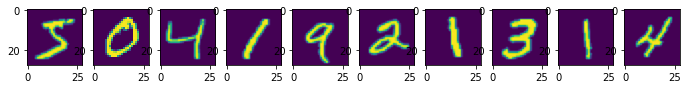

In [ ]:
fig,ax = plt.subplots(ncols =10, figsize=(11.7,10))
for i in range(10):
  ax[i].imshow(X_train[i])



In [ ]:
print(np.unique(X_train), np.unique(y_train))


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
X_train =X_train/255
X_test =X_test/255

# Model 1:
* --> For 10 Epochs.
* --> Input and Two Hidden layer with 50 neurons and Relu Activation Function. Output Layer has Softmax Activation Function.
* --> Optimizer : Adam
* --> Loss Function : Sparse Categorical Cross Entropy

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1051 

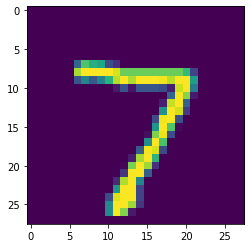

Predicted:  7


In [ ]:
tf.random.set_seed(3)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation ="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer =tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history1 = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

loss1, accuracy1 = model.evaluate(X_test, y_test)
print("Loss: ", round(loss1,2), "Accuracy: ","%.2f"%accuracy1)

plt.imshow( X_test[0])
plt.show()
print("Predicted: ",y_test[0])

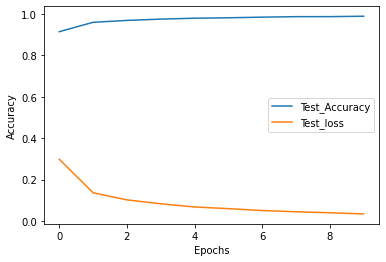

In [ ]:
plt.plot(history1.history["accuracy"], label ="Test_Accuracy")
plt.plot(history1.history["loss"], label ="Test_loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model 2:
* --> For 5 Epochs.
* --> Input and One Hidden layer with 28 neurons and Relu Activation Function. Output Layer has Softmax Activation Function.
* --> Optimizer : Stochastic Gradient Descent
* --> Loss Function : Sparse Categorical Cross Entropy

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7049 - accuracy: 0.8156
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8978
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3215 - accuracy: 0.9086
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2981 - accuracy: 0.9159
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.9247
Loss:  0.27 Accuracy:  0.92


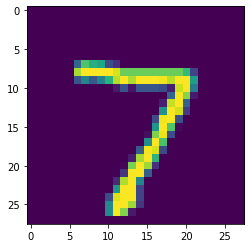

Predicted:  7


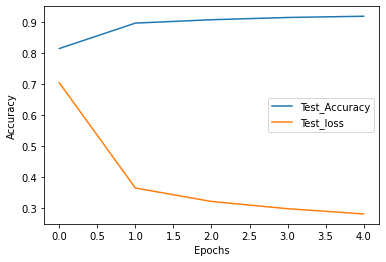

In [ ]:
tf.random.set_seed(3)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(28, activation ="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer =tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

history2 = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)

loss2, accuracy2 = model.evaluate(X_test, y_test)
print("Loss: ", round(loss2,2), "Accuracy: ","%.2f"%accuracy2)

plt.imshow( X_test[0])
plt.show()
print("Predicted: ",y_test[0])

plt.plot(history2.history["accuracy"], label ="Test_Accuracy")
plt.plot(history2.history["loss"], label ="Test_loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model 3:
* --> For 20 Epochs.
* -->  One Hidden layer with 28 neurons and Relu Activation Function. Second Hidden Layer with 30 neurons Output Layer has Softmax Activation Function.
* --> Optimizer : Stochastic Gradient Descent
* --> Loss Function : Sparse Categorical Cross Entropy

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7749 - accuracy: 0.7763
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3306 - accuracy: 0.9055
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2814 - accuracy: 0.9187
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9283
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2288 - accuracy: 0.9341
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2102 - accuracy: 0.9393
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1948 - accuracy: 0.9434
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1811 - accuracy: 0.9482
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1702 - accuracy: 0.9506
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.160

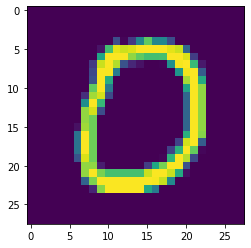

Predicted:  0


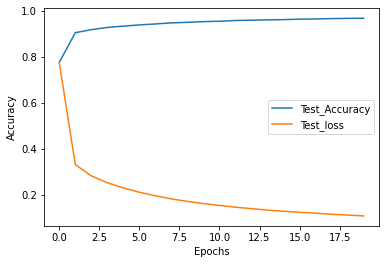

In [ ]:
tf.random.set_seed(3)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(28, activation ="relu"),
    tf.keras.layers.Dense(30, activation ="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer =tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

history3 = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=20)

loss3, accuracy3 = model.evaluate(X_test, y_test)
print("Loss: ", round(loss3,2), "Accuracy: ","%.2f"%accuracy3)

plt.imshow( X_test[10])
plt.show()
print("Predicted: ",y_test[10])

plt.plot(history3.history["accuracy"], label ="Test_Accuracy")
plt.plot(history3.history["loss"], label ="Test_loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model 4:
* --> For 5 Epochs.
* --> One Input and three Hidden layer with 28,30,25 neurons respectively and Relu Activation Function. Output Layer has Softmax Activation Function.
* --> Optimizer : Stochastic Gradient descent
* --> Loss Function : Sparse Categorical Cross Entropy

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2920 - accuracy: 0.1624
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1101 - accuracy: 0.4066
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7695 - accuracy: 0.3946
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5410 - accuracy: 0.4002
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4136 - accuracy: 0.4055
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3463 - accuracy: 0.4144
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2996 - accuracy: 0.4261
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2652 - accuracy: 0.4323
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2415 - accuracy: 0.4394
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.2140 

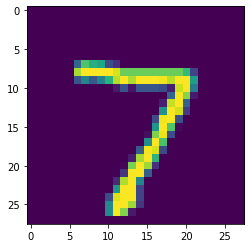

Predicted:  7


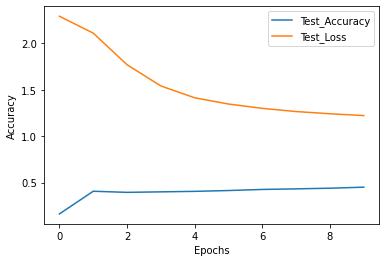

In [ ]:
tf.random.set_seed(3)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(28, activation ="relu"),
    tf.keras.layers.Dense(30, activation ="relu"),
    tf.keras.layers.Dense(25, activation ="softmax"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

a = model.compile(loss = "sparse_categorical_crossentropy",
              optimizer =tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

history4 = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

loss4, accuracy4 = model.evaluate(X_test, y_test)
print("Loss: ", round(loss4,2), "Accuracy: ","%.2f"%accuracy4)

plt.imshow( X_test[0])
plt.show()
print("Predicted: ",y_test[0])

plt.plot(history4.history["accuracy"], label ="Test_Accuracy")
plt.plot(history4.history["loss"],label = "Test_Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Conclusion


In [ ]:
import pandas as pd
Model= [1,2,3,4]
Epochs = [history1.epoch[-1]+1, history2.epoch[-1]+1, history3.epoch[-1]+1, history4.epoch[-1]+1]
loss = [loss1, loss2, loss3,loss4]
hidden_layers=[2, 1, 2,3]
optimizer= ["Adam", "SGD", "SGD", "SGD"]
accuracy=[accuracy1, accuracy2, accuracy3, accuracy4]
data = {"Model": Model, "Epochs": Epochs, "Hidden Layers": hidden_layers, "Optimizer": optimizer,"Loss":loss,  "Accuracy":accuracy}
pd.DataFrame(data)

,Model,Epochs,Hidden Layers,Optimizer,Loss,Accuracy
0,1,10,2,Adam,0.105052,0.9699
1,2,5,1,SGD,0.267958,0.9247
2,3,20,2,SGD,0.134427,0.9588
3,4,10,3,SGD,1.213973,0.4730



From the above table we can infer that Model 1 and Model 3 are better in terms of accuracy. They were trained on 10 and 20 epochs using Adam and Stochastic Gradient Descent Optimizer respectively. The loss of these two models is also comparatively low. Both the models were built using 2 hidden layers.